# ECE-GY 9273 Python programs for Exercise series 2
This ipython script contains python programs submitted in partial fullfilment of Exercise 2 
Simply restart and run all and all numerical results in the submitted pdf will be reproduced
For further information, please contact taoli@nyu.edu

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

## Exercise 1 
write a function get_laplacian for computing laplacian matrices
### question (a) defining functions

In [2]:
#computing Laplacian matrix for a given graph
#input: edges: list of edges; n_vertices: number of vertices; flag: true for directed and false for undirected
#return: the corresponding Laplacian
def get_laplacian(edges, n_vertices,flag):
    #pre-allocation for adjacency matrix
    Adja=np.zeros((n_vertices,n_vertices),dtype=int)
    for e in edges:
        Adja[e[1],e[0]]=1;
    if flag==False : #undirected graph
        #computing the transpose 
        Adja_trans=np.transpose(Adja)
        Adja=Adja+Adja_trans  
    #For both directed and undirected, sum of columns gives degrees
    d=np.sum(Adja,axis=1)
    D=np.diag(d)
    #compute Laplacian
    L=D-Adja
    return L

### question (b) testing the function

In [3]:
# the undirected graph in exercise 2
E1=[[0,2],[1,2],[2,3],[2,4],[2,6],[4,5],[4,6],[4,7],[5,6],[6,7],[6,8]]
n1=9
L1=get_laplacian(E1,n1,False)
L1

array([[ 1,  0, -1,  0,  0,  0,  0,  0,  0],
       [ 0,  1, -1,  0,  0,  0,  0,  0,  0],
       [-1, -1,  5, -1, -1,  0, -1,  0,  0],
       [ 0,  0, -1,  1,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  0,  4, -1, -1, -1,  0],
       [ 0,  0,  0,  0, -1,  2, -1,  0,  0],
       [ 0,  0, -1,  0, -1, -1,  5, -1, -1],
       [ 0,  0,  0,  0, -1,  0, -1,  2,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  0,  1]])

In [4]:
# the directed graph in exercise 3
#to be consistent with previous notations, we start with zero for labeling the vertices
E2=[[1,0],[1,2],[2,4],[3,2],[4,1],[4,3]]
n2=5
get_laplacian(E2,n2,True)

array([[ 1, -1,  0,  0,  0],
       [ 0,  1,  0,  0, -1],
       [ 0, -1,  2, -1,  0],
       [ 0,  0,  0,  1, -1],
       [ 0,  0, -1,  0,  1]])

### question (c) computing eigevalues
we first define a function "edges_cycle" for generating the edge set for a given cycle graph and then define "eigvalue_cycle" for computing eigenvalues.

In [5]:
#creating the set of edges of a given cycle graphs
def edges_cycle(n_vertices):
    #preallocation
    edges=np.empty((n_vertices,2),dtype=int)
    for i in range(n_vertices):
        edges[i]=[i,i+1]
    #the label ranges from 0 to n-1, so we have to do a modulo that maps n to 0
    edges=np.fmod(edges,n_vertices)
    return edges

#computing two smallest and two largest eignvalues of a given cycle graph
def eigvalue_cycle(n_vertices):
    #constructing edges
    edges = edges_cycle(n_vertices)
    #computing laplacian
    L = get_laplacian(edges,n_vertices,False)
    #computing eigenvalues
    eigv,_=LA.eig(L)
    #sorting
    sort_eigv=np.sort(eigv)
    output_eig=np.array([sort_eigv[0],sort_eigv[1],sort_eigv[-2],sort_eigv[-1]])
    return output_eig

In [6]:
eigvalue_cycle(5)

array([-2.87949739e-17,  1.38196601e+00,  3.61803399e+00,  3.61803399e+00])

In [7]:
eigvalue_cycle(15)

array([-4.10528340e-16,  1.72909085e-01,  3.95629520e+00,  3.95629520e+00])

In [8]:
eigvalue_cycle(199)

array([4.99382786e-15, 9.96821748e-04, 3.99975078e+00, 3.99975078e+00])

## Exercise 2
consensus algotirhm simulation using Euler forward difference 

## question (a)  writing a function "simulate_consensus" with predefined termination time

In [9]:
#consensus algorithm using Euler's method
#input: initial condition x0; time horizon: T(required to be multiple of dt), Laplacian: L
#return: t: a time discretization of [0, T]; X: the evolution of states stored in a matrix
def simulate_consensus(x0,T,L,dt=0.001):
    #partition in time
    N=int(T/dt)
    t=np.linspace(0,T,N+1)
    #preallocation for time-varying states
    n=np.size(x0)#dimension
    #pre-allocation for X data_storage
    X=np.empty((n,N),dtype=float)
    for i in range(1,N):
        #Euler forward difference
        x1=x0-dt*np.matmul(L,x0)
        #keeping record
        X[:,i]=x1
        x0=x1
    return (t,X)



## question (b) writing a funcion without specifying the termination time
In this question, we define a new function "consensus_notime" meaning that no termination time is specified in prior, where we shall use a while loop. Also, to properly terminate the simulation, we further define a function "dist_neigh" which is used to detect the distance between two adajacent nodes, once it is below the tolerance, i.e., 0.01, we can safely conclude that the algorithm converges. 

In [10]:
#consensus algorithm using Euler's method without specifying time horizon
#input: initial condition x0; edge set: E; number of vertices: n; flag: flag: true for directed 
#and false for undirected tolerance: eta
#return: T: termination time; t: a time discretization of [0, T]; X: the evolution of states stored in a matrix
def consensus_notime(x0,E,n_vertices,flag,eta,dt=0.001):
    #compute the laplacian
    L=get_laplacian(E,n_vertices,flag)
    n=np.size(x0)#dimension
    #innitialization
    X=x0#data storage
    e=1#distance 
    T=0#termination time
    t=np.array([0])# time discretization
    #while loop until distance is below the tolerance 
    while e>eta:
        x1=x0-dt*np.matmul(L,x0)
        #compute the distance
        e=dist_neigh(x1,E)
        #append the new state 
        X=np.vstack((X,x1))
        T=T+dt
        #append the new time partition
        t=np.hstack((t,[T]))
        x0=x1
    X=np.transpose(X)
    return(T,t,X)  

#computing the maximum distance between two adajacent nodes
#input: state variable: x; set of edges: E
def dist_neigh(x,E):
    dist=0;
    for e in E:
        d=abs(x[e[0]]-x[e[1]])
        dist=max(dist,d)
    return dist

In [11]:
x0=np.array([10,20,12,5,30,12,15,16,25])
T,t,X=consensus_notime(x0,E1,n1,False,0.01)
T#  time

11.387999999999128

In [12]:
# the consensus
X[:,-1]

array([16.10117713, 16.10128979, 16.10656015, 16.1011208 , 16.11511557,
       16.1175888 , 16.11656003, 16.1175888 , 16.12299894])

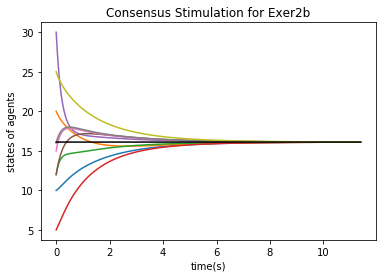

In [13]:
prediction_2b=16.11*np.ones(np.size(t))
plt.title('Consensus Stimulation for Exer2b')
plt.xlabel('time(s)')
plt.ylabel('states of agents')
plt.plot(t,X.T)
plt.plot(t,prediction_2b,'black')
plt.savefig('consensus_ex2.pdf')

## question (c) dicsonnected case

In [14]:
# defining the graph
E3=[[0,2],[1,2],[2,3],[4,5],[4,6],[4,7],[5,6],[6,7],[6,8]]
n3=9
L3=get_laplacian(E3,n3,False)

In [15]:
T_dc,t_dc,X_dc=consensus_notime(x0,E3,n3,False,0.01)
T_dc


6.72300000000058

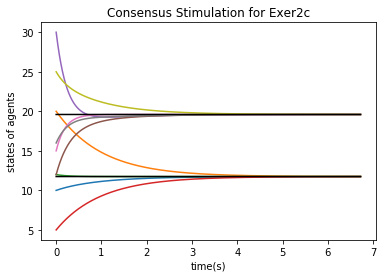

In [16]:
prediction_dc1=11.75*np.ones(np.size(t_dc))
prediction_dc2=19.6*np.ones(np.size(t_dc))
plt.title('Consensus Stimulation for Exer2c')
plt.xlabel('time(s)')
plt.ylabel('states of agents')
plt.plot(t_dc,X_dc.T)
plt.plot(t_dc,prediction_dc1,'black')
plt.plot(t_dc,prediction_dc2,'black')
plt.savefig('consensus_ex2_dc.pdf')

## question (d) Complete graph 
we shall first define a function "edges_complete" for constructing edges and then we implement the predefined function.

In [17]:
from scipy.special import comb
#constructing edges of a complete graph
def edges_complete(n_vertices):
    #the number of edges in total
    n= int(comb(n_vertices,2))
    #pre-allocation
    edges=np.empty((n,2),dtype=int)
    count=0
    for i in range(n_vertices-1):
        for j in range(i+1,n_vertices):
            edges[count]=[i,j]
            count=count+1
    return edges

In [18]:
#an example
edges_complete(4)


array([[0, 1],
       [0, 2],
       [0, 3],
       [1, 2],
       [1, 3],
       [2, 3]])

The following two cells try to explain why the convergence for complete graph is faster than that for the original graph, where the second smallest eigenvalues are computed.

In [19]:
# computing the second smallest eignvalue of the Laplacian
n1=9
edges_c=edges_complete(n1)
L_c=get_laplacian(edges_c,n1,False)
eigv,_=LA.eig(L_c)
sort_eigv=np.sort(eigv)
sort_eigv[1]

8.999999999999993

In [20]:
# computing the second smallest eignvalue of the original Laplacian
eigv1,_=LA.eig(L1)
sort_eigv1=np.sort(eigv1)
sort_eigv1[1]

0.5410970573643523

In [21]:
# simulaion complete graph with 9 vertices

Tc,tc,Xc=consensus_notime(x0,edges_c,n1,False,0.01,dt=0.001)

In [22]:
#time 
Tc

0.8660000000000007

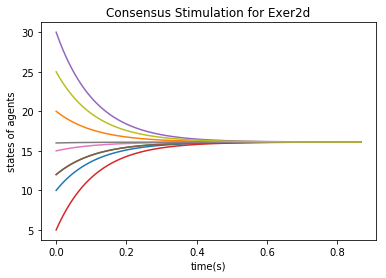

In [23]:
plt.title('Consensus Stimulation for Exer2d')
plt.xlabel('time(s)')
plt.ylabel('states of agents')
plt.plot(tc,Xc.T)
plt.savefig('consensus_ex2_d.pdf')

The following cell tries to explain the slow convergence in cycle graph case through an eigenvalue perspective 

In [24]:
edges_cy=edges_cycle(n1)
L_cy=get_laplacian(edges_cy,n1,False)
eigv_cy,_=LA.eig(L_cy)
sort_eigv_cy=np.sort(eigv_cy)
sort_eigv_cy[1]

0.46791111376204364

In [25]:
Tcy,tcy,Xcy=consensus_notime(x0,edges_cy,n1,False,0.01,dt=0.001)

In [26]:
#time
Tcy

10.659999999999531

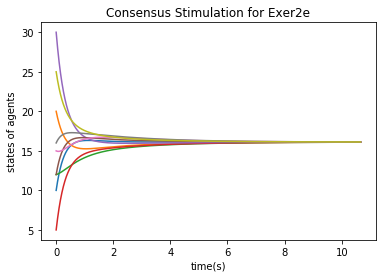

In [27]:
plt.title('Consensus Stimulation for Exer2e')
plt.xlabel('time(s)')
plt.ylabel('states of agents')
plt.plot(tcy,Xcy.T)
plt.savefig('consensus_ex2_e.pdf')

# Exercise 3
## question (f)

In [28]:
x_dg=np.array([10,5,1,-5,-10])

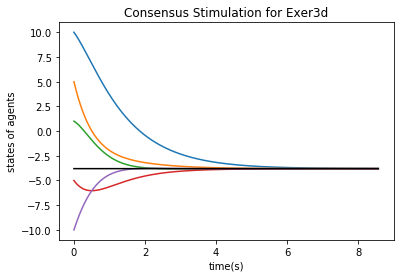

In [29]:
#verifying question(c)
T3c,t3c,X3c=consensus_notime(x_dg,E2,n2,True,0.01,dt=0.001)
predict_c=-3.8*np.ones(np.size(t3c))
plt.title('Consensus Stimulation for Exer3d')
plt.xlabel('time(s)')
plt.ylabel('states of agents')
plt.plot(t3c,X3c.T)
plt.plot(t3c,predict_c,'black')
plt.savefig('consensus_ex3_c.pdf')

In [30]:
T3c

8.559000000000696

In [31]:
#adding [v_1,v_5], [v_3,v_2]
E_d=[[1,0],[1,2],[2,4],[3,2],[4,1],[4,3],[0,4],[2,1]]
Ld=get_laplacian(E_d,n2,True)
Ld

array([[ 1, -1,  0,  0,  0],
       [ 0,  2, -1,  0, -1],
       [ 0, -1,  2, -1,  0],
       [ 0,  0,  0,  1, -1],
       [-1,  0, -1,  0,  2]])

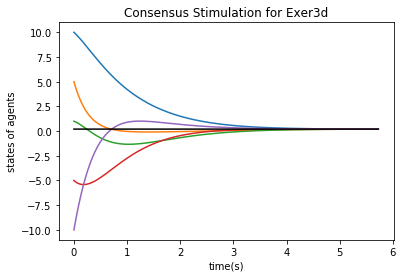

In [32]:
#verifying question(d)
T3d,t3d,X3d=consensus_notime(x_dg,E_d,n2,True,0.01,dt=0.001)
predict_d=0.2*np.ones(np.size(t3d))
plt.title('Consensus Stimulation for Exer3d')
plt.xlabel('time(s)')
plt.ylabel('states of agents')
plt.plot(t3d,X3d.T)
plt.plot(t3d,predict_d,'black')
plt.savefig('consensus_ex3_d.pdf')

In [33]:
T3d

5.725000000000247

In [34]:
#removing [v_5,v_4]
E_e=[[1,0],[1,2],[2,4],[3,2],[4,1]]
Le=get_laplacian(E_e,n2,True)
Le

array([[ 1, -1,  0,  0,  0],
       [ 0,  1,  0,  0, -1],
       [ 0, -1,  2, -1,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0, -1,  0,  1]])

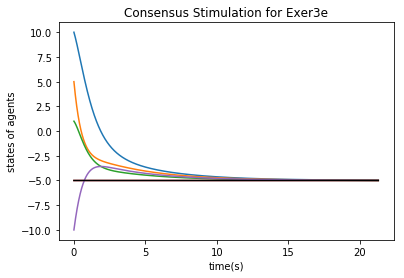

In [35]:
#verifying question(e)
T3e,t3e,X3e=consensus_notime(x_dg,E_e,n2,True,0.01,dt=0.001)
predict_e=-5*np.ones(np.size(t3e))
plt.title('Consensus Stimulation for Exer3e')
plt.xlabel('time(s)')
plt.ylabel('states of agents')
plt.plot(t3e,X3e.T)
plt.plot(t3e,predict_e,'black')
plt.savefig('consensus_ex3_e.pdf')

In [36]:
T3e

21.303000000003053